# Lab 3: Validation Curves and Learning Curves

In this lab, you will learn how to use **validation curves** and **learning curves** to:
- Choose the best hyperparameters for a model
- Determine whether adding more training samples would improve model performance
- Diagnose overfitting and underfitting

**Objectives:**
- Understand the difference between validation curves and learning curves
- Use validation curves to optimize hyperparameters
- Use learning curves to assess data needs
- Interpret curves to make informed decisions about model complexity and data collection

**Instructions:**
- This is the solution notebook with all code filled in
- Study each cell carefully to understand how to use these diagnostic tools
- Pay attention to the interpretation sections

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import (
    ValidationCurveDisplay, 
    LearningCurveDisplay,
    StratifiedKFold
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Set random seed for reproducibility
np.random.seed(42)

We will use the **digits dataset** from scikit-learn, which contains 8x8 images of handwritten digits (0-9). This is a classic machine learning dataset with 1,797 samples and 64 features.

In [2]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Classes: {np.unique(y)}")

Dataset shape: (1797, 64)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]


## 2. Understanding Validation Curves

A **validation curve** shows how a model's performance varies as we change a single hyperparameter.

The curve plots:
- **Training score** (blue): Performance on the training data
- **Validation score** (orange): Performance on validation folds (via cross-validation)

This helps us:
1. **Identify underfitting**: When both training and validation scores are low and similar
2. **Identify overfitting**: When training score is high but validation score is low (large gap)
3. **Find the sweet spot**: Where the validation score is highest (best generalization)

### 2.1 Validation Curve for k-Nearest Neighbors (k parameter)

In KNN, the `n_neighbors` parameter (k) controls model complexity:
- **Small k** (e.g., k=1): Model is very flexible, can overfit
- **Large k** (e.g., k=50): Model is simple, might underfit

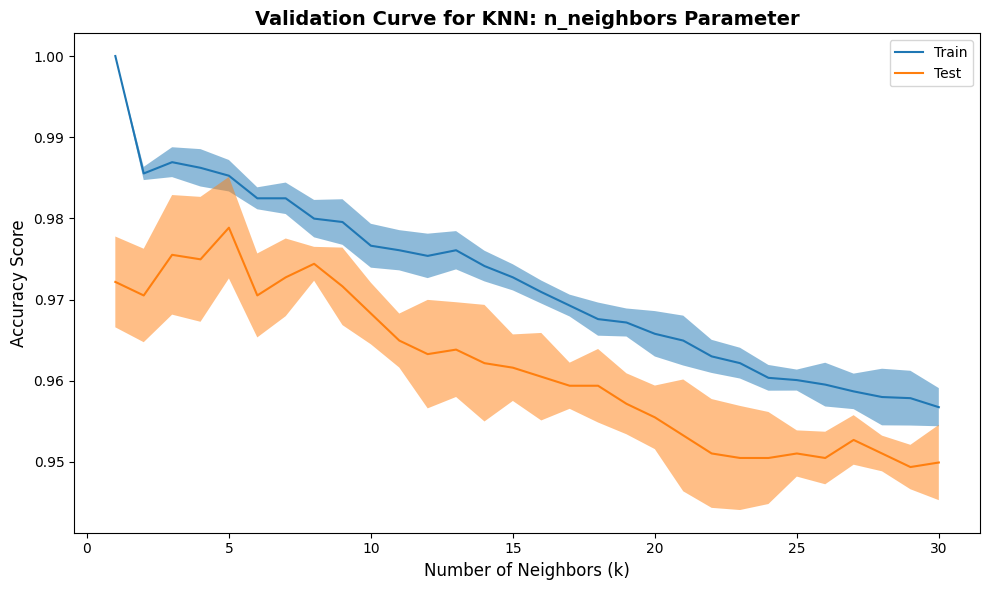


Interpretation:
- For small k values (1-5): Large gap between training and validation scores → OVERFITTING
- Around k=5-10: Validation score is highest → OPTIMAL RANGE
- For large k values (>15): Both scores decline → UNDERFITTING


In [3]:
# Create a KNN pipeline
knn_pipeline = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)

# Define the range of k values to test
k_range = np.arange(1, 31, 1)

# Create and display the validation curve
fig, ax = plt.subplots(figsize=(10, 6))
display = ValidationCurveDisplay.from_estimator(
    knn_pipeline,
    X, y,
    param_name="kneighborsclassifier__n_neighbors",
    param_range=k_range,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    ax=ax,
    n_jobs=-1
)
ax.set_title("Validation Curve for KNN: n_neighbors Parameter", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Neighbors (k)", fontsize=12)
ax.set_ylabel("Accuracy Score", fontsize=12)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- For small k values (1-5): Large gap between training and validation scores → OVERFITTING")
print("- Around k=5-10: Validation score is highest → OPTIMAL RANGE")
print("- For large k values (>15): Both scores decline → UNDERFITTING")

### 2.2 Validation Curve for Random Forest (max_depth parameter)

In Random Forest, the `max_depth` parameter controls tree depth:
- **Small max_depth**: Trees are shallow and simple (underfitting risk)
- **Large max_depth**: Trees are deep and complex (overfitting risk)

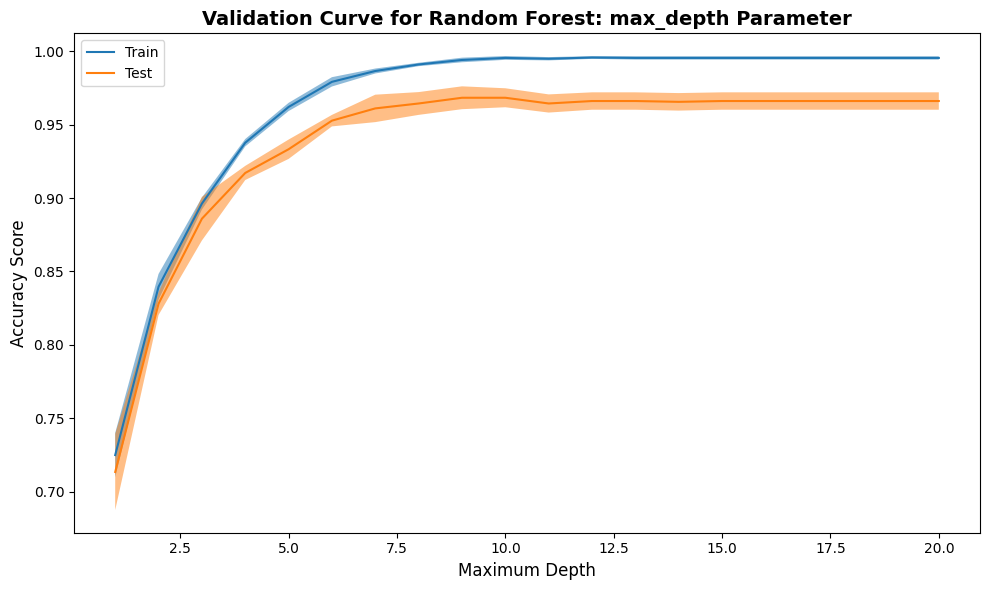


Interpretation:
- For small depth values (1-3): Validation score low → UNDERFITTING
- For medium depth (5-10): Validation score peaks → OPTIMAL RANGE
- For large depth values (>12): Gap widens → OVERFITTING
- Note: min_samples_split and min_samples_leaf prevent perfect training accuracy


In [4]:
# Create a Random Forest pipeline
# Add min_samples_split to prevent overfitting (trees need at least 10 samples to split)
rf_pipeline = RandomForestClassifier(
    n_estimators=100, 
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Define the range of max_depth values to test
depth_range = np.arange(1, 21, 1)

# Create and display the validation curve
fig, ax = plt.subplots(figsize=(10, 6))
display = ValidationCurveDisplay.from_estimator(
    rf_pipeline,
    X, y,
    param_name="max_depth",
    param_range=depth_range,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    ax=ax,
    n_jobs=-1
)
ax.set_title("Validation Curve for Random Forest: max_depth Parameter", fontsize=14, fontweight='bold')
ax.set_xlabel("Maximum Depth", fontsize=12)
ax.set_ylabel("Accuracy Score", fontsize=12)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- For small depth values (1-3): Validation score low → UNDERFITTING")
print("- For medium depth (5-10): Validation score peaks → OPTIMAL RANGE")
print("- For large depth values (>12): Gap widens → OVERFITTING")
print("- Note: min_samples_split and min_samples_leaf prevent perfect training accuracy")

### 2.3 Validation Curve for SVM (gamma parameter)

In SVM with RBF kernel, the `gamma` parameter controls how much each training point influences the decision boundary:
- **Small gamma**: Smooth decision boundary (simple model)
- **Large gamma**: Complex, wiggly decision boundary (complex model)

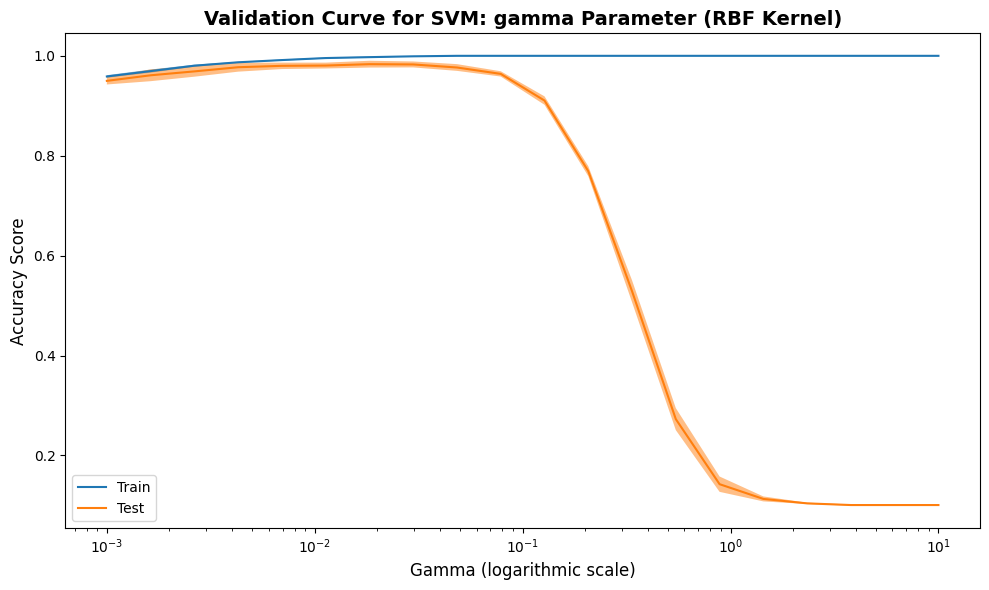


Interpretation:
- For small gamma (0.001-0.01): Simple boundary → Possible underfitting
- For medium gamma (0.01-0.1): Optimal range → Best validation score
- For large gamma (>0.1): Complex boundary → Overfitting (gap between train and validation)


In [5]:
# Create an SVM pipeline
svm_pipeline = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", random_state=42)
)

# Define the range of gamma values on a logarithmic scale
gamma_range = np.logspace(-3, 1, num=20)  # From 0.001 to 10

# Create and display the validation curve
fig, ax = plt.subplots(figsize=(10, 6))
display = ValidationCurveDisplay.from_estimator(
    svm_pipeline,
    X, y,
    param_name="svc__gamma",
    param_range=gamma_range,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    ax=ax,
    n_jobs=-1
)
ax.set_title("Validation Curve for SVM: gamma Parameter (RBF Kernel)", fontsize=14, fontweight='bold')
ax.set_xlabel("Gamma (logarithmic scale)", fontsize=12)
ax.set_ylabel("Accuracy Score", fontsize=12)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- For small gamma (0.001-0.01): Simple boundary → Possible underfitting")
print("- For medium gamma (0.01-0.1): Optimal range → Best validation score")
print("- For large gamma (>0.1): Complex boundary → Overfitting (gap between train and validation)")

## 3. Understanding Learning Curves

A **learning curve** shows how a model's performance improves as we increase the amount of training data.

The curve plots:
- **Training score**: Performance on the training data (typically high and stable)
- **Validation score**: Performance on validation folds (typically improves with more data)

Different patterns tell us:
1. **Converging curves (small gap)**: Model has high bias, adding more data won't help much
2. **Diverging curves (large gap)**: Model has high variance, adding more data will help
3. **Both curves plateau early**: Model is likely underfitting (need more complex model)
4. **Validation curve still rising**: Collecting more data would help (high variance)

### 3.1 Learning Curve for KNN (with optimal k from validation curve)

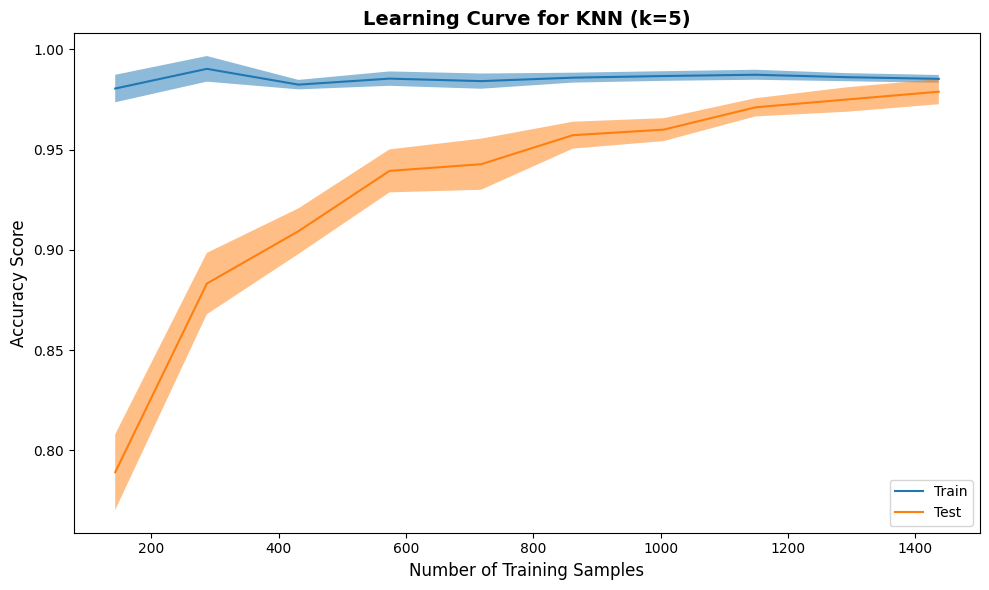


Interpretation:
- Training score: Decreases as we add more data (model can't fit noise perfectly)
- Validation score: Increases as we add more data (model learns better patterns)
- The gap between curves represents overfitting
- If both curves plateau: Adding more data won't help much


In [6]:
# Create KNN with optimal k=5 (from validation curve)
knn_optimal = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=5)
)

# Create and display the learning curve
fig, ax = plt.subplots(figsize=(10, 6))
display = LearningCurveDisplay.from_estimator(
    knn_optimal,
    X, y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    ax=ax,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
ax.set_title("Learning Curve for KNN (k=5)", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Training Samples", fontsize=12)
ax.set_ylabel("Accuracy Score", fontsize=12)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Training score: Decreases as we add more data (model can't fit noise perfectly)")
print("- Validation score: Increases as we add more data (model learns better patterns)")
print("- The gap between curves represents overfitting")
print("- If both curves plateau: Adding more data won't help much")

### 3.2 Learning Curve for Random Forest (with optimal depth from validation curve)

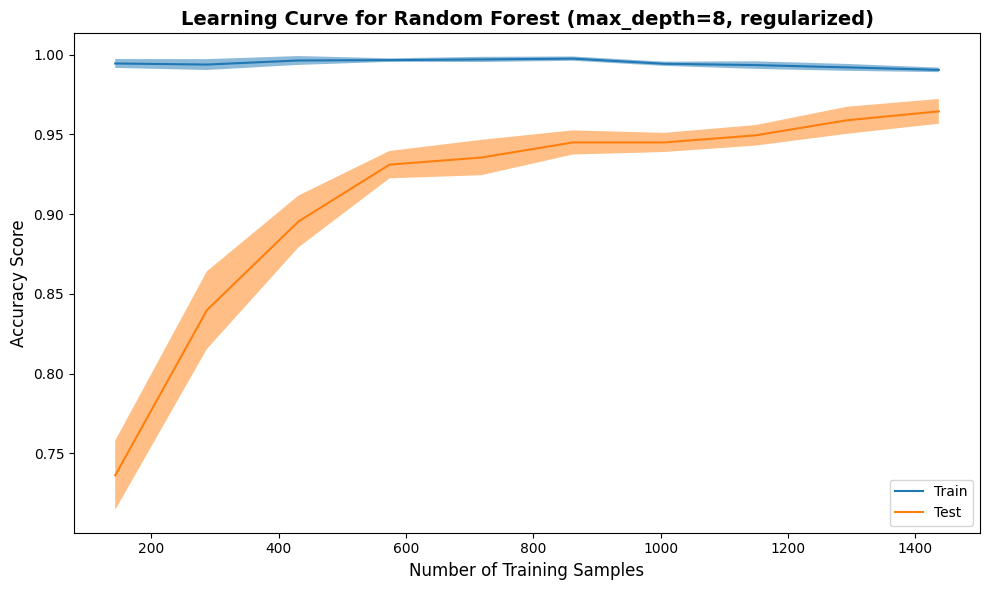


Interpretation:
- Compare the gap between training and validation scores
- If the gap is small and both plateau: The model is well-tuned
- If the gap is large: The model might benefit from more data
- The regularization parameters prevent perfect (1.0) training accuracy


In [7]:
# Create Random Forest with optimal max_depth=8 (from validation curve)
# Include regularization to prevent overfitting
rf_optimal = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Create and display the learning curve
fig, ax = plt.subplots(figsize=(10, 6))
display = LearningCurveDisplay.from_estimator(
    rf_optimal,
    X, y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    ax=ax,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
ax.set_title("Learning Curve for Random Forest (max_depth=8, regularized)", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Training Samples", fontsize=12)
ax.set_ylabel("Accuracy Score", fontsize=12)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Compare the gap between training and validation scores")
print("- If the gap is small and both plateau: The model is well-tuned")
print("- If the gap is large: The model might benefit from more data")
print("- The regularization parameters prevent perfect (1.0) training accuracy")

### 3.3 Learning Curve for SVM (with optimal gamma from validation curve)

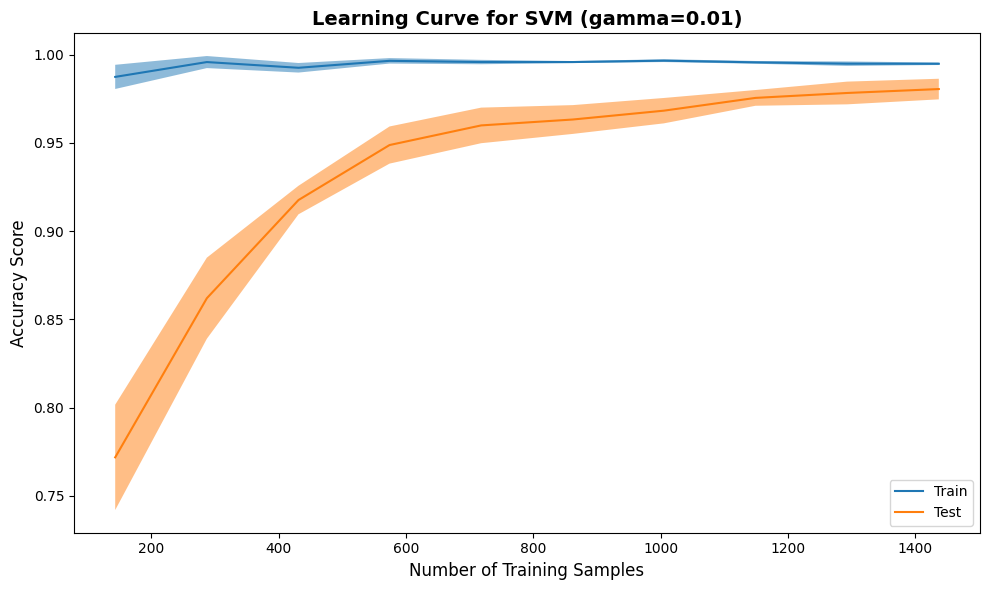


Interpretation:
- Observe if the validation curve is still rising at the right end
- If still rising: Collecting more training data would likely improve performance
- If plateau: The model has captured what it can from this algorithm


In [8]:
# Create SVM with optimal gamma=0.01 (from validation curve)
svm_optimal = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=0.01, random_state=42)
)

# Create and display the learning curve
fig, ax = plt.subplots(figsize=(10, 6))
display = LearningCurveDisplay.from_estimator(
    svm_optimal,
    X, y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    ax=ax,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
ax.set_title("Learning Curve for SVM (gamma=0.01)", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Training Samples", fontsize=12)
ax.set_ylabel("Accuracy Score", fontsize=12)
plt.tight_layout()
plt.show()

print("\nInterpretation:")
print("- Observe if the validation curve is still rising at the right end")
print("- If still rising: Collecting more training data would likely improve performance")
print("- If plateau: The model has captured what it can from this algorithm")

## 4. Practical Decision-Making Guide

### How to use these curves to make decisions:

#### **Step 1: Use Validation Curves to Find Optimal Parameters**
- Generate validation curves for key hyperparameters
- Choose the parameter value where validation score is highest
- Watch for signs of overfitting (large gap) or underfitting (both scores low)

#### **Step 2: Use Learning Curves to Assess Data Needs**
- Generate a learning curve with the optimal parameters
- Look at the validation score trend:
  - **Still rising at the end?** → Collect more data
  - **Plateau?** → Either stop or use a more complex model
  - **Gap closing as data increases?** → Good sign of improving generalization

#### **Step 3: Interpret Different Patterns**

### 4.1 Example: Diagnosing a Poorly-Tuned Model (Underfitting)

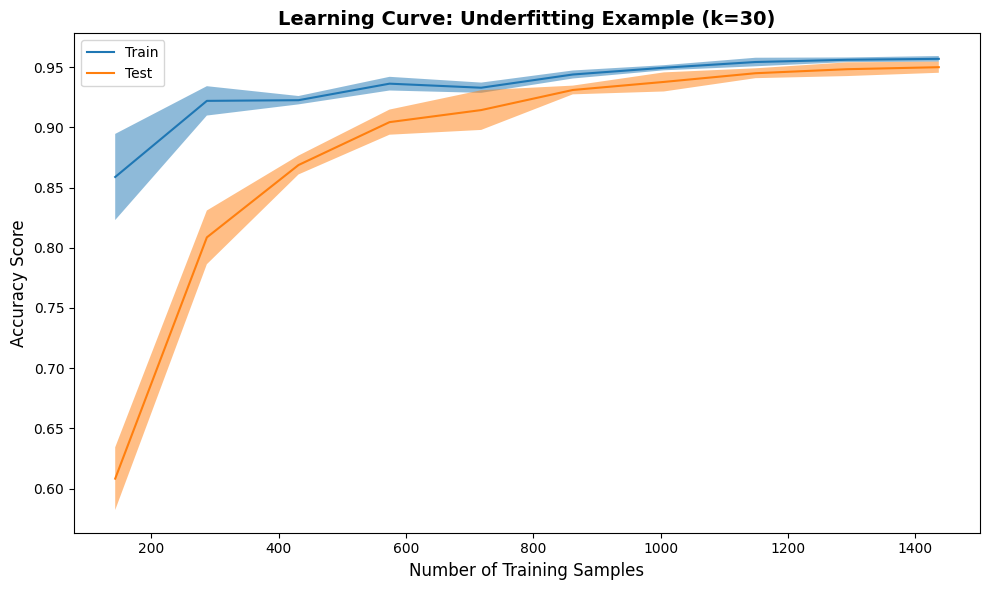


Diagnosis: UNDERFITTING
Symptoms:
- Both training and validation scores are low
- Small gap between training and validation scores
- Both curves plateau early at low accuracy

Remedies:
- Reduce k (use smaller n_neighbors) to make model more complex
- Use a more expressive model (e.g., Random Forest instead of KNN)
- Collect more features (feature engineering)


In [9]:
# Create a very simple model that will underfit
knn_simple = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=30)  # Too high k → underfitting
)

# Create the learning curve
fig, ax = plt.subplots(figsize=(10, 6))
display = LearningCurveDisplay.from_estimator(
    knn_simple,
    X, y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    ax=ax,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
ax.set_title("Learning Curve: Underfitting Example (k=30)", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Training Samples", fontsize=12)
ax.set_ylabel("Accuracy Score", fontsize=12)
plt.tight_layout()
plt.show()

print("\nDiagnosis: UNDERFITTING")
print("Symptoms:")
print("- Both training and validation scores are low")
print("- Small gap between training and validation scores")
print("- Both curves plateau early at low accuracy")
print("\nRemedies:")
print("- Reduce k (use smaller n_neighbors) to make model more complex")
print("- Use a more expressive model (e.g., Random Forest instead of KNN)")
print("- Collect more features (feature engineering)")

### 4.2 Example: Diagnosing an Overfitting Model (High Variance)

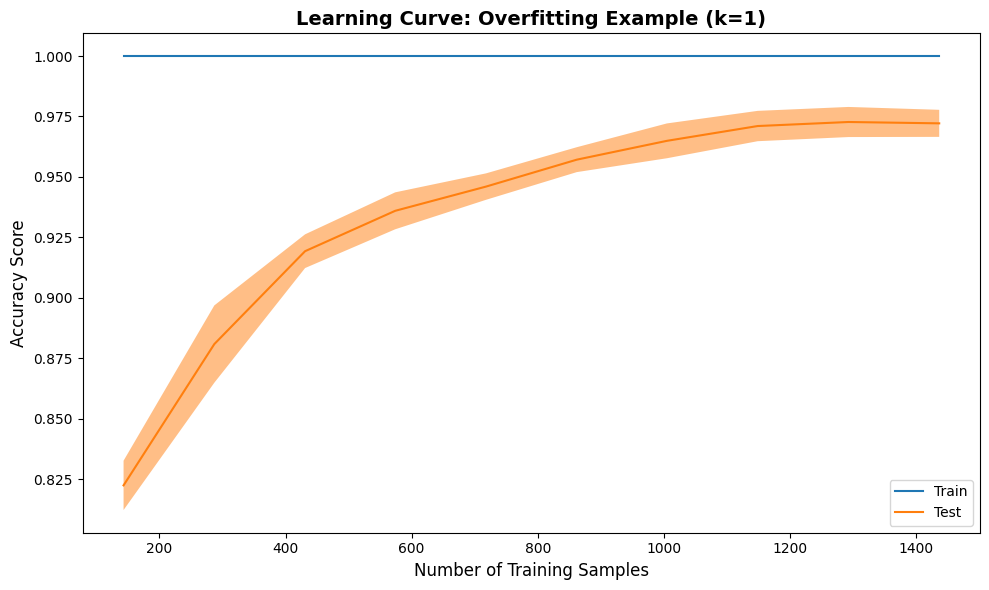


Diagnosis: OVERFITTING (High Variance)
Symptoms:
- Training score is very high
- Validation score is much lower
- Large gap between training and validation curves
- Validation curve rising as we add more data (could benefit from more samples)

Remedies:
- Increase k (use larger n_neighbors) to regularize
- Collect more training data (the gap suggests data would help)
- Use regularization techniques (L1/L2 for linear models, depth limit for trees)
- Reduce model complexity (fewer features, simpler architecture)


In [10]:
# Create a very complex model that will overfit
knn_complex = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=1)  # k=1 → overfitting
)

# Create the learning curve
fig, ax = plt.subplots(figsize=(10, 6))
display = LearningCurveDisplay.from_estimator(
    knn_complex,
    X, y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    ax=ax,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
ax.set_title("Learning Curve: Overfitting Example (k=1)", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Training Samples", fontsize=12)
ax.set_ylabel("Accuracy Score", fontsize=12)
plt.tight_layout()
plt.show()

print("\nDiagnosis: OVERFITTING (High Variance)")
print("Symptoms:")
print("- Training score is very high")
print("- Validation score is much lower")
print("- Large gap between training and validation curves")
print("- Validation curve rising as we add more data (could benefit from more samples)")
print("\nRemedies:")
print("- Increase k (use larger n_neighbors) to regularize")
print("- Collect more training data (the gap suggests data would help)")
print("- Use regularization techniques (L1/L2 for linear models, depth limit for trees)")
print("- Reduce model complexity (fewer features, simpler architecture)")

### 4.3 Example: Well-Tuned Model

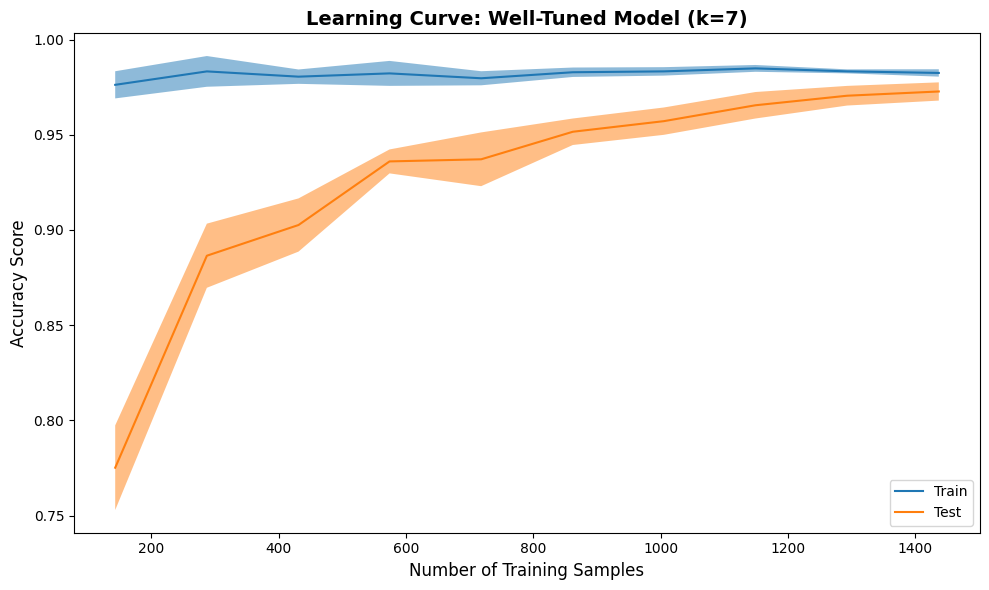


Diagnosis: WELL-TUNED
Characteristics:
- Training and validation scores are both reasonably high
- Gap between curves is moderate and stable
- Both curves converge to a good accuracy level
- Validation curve may still have slight room for improvement

Next Steps:
- Consider if the model is good enough for your use case
- If validation score is still rising: Could collect more data
- If plateau: Model is stable and ready for production


In [11]:
# Create a well-tuned model
knn_tuned = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=7)  # Well-balanced k
)

# Create the learning curve
fig, ax = plt.subplots(figsize=(10, 6))
display = LearningCurveDisplay.from_estimator(
    knn_tuned,
    X, y,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
    scoring="accuracy",
    ax=ax,
    train_sizes=np.linspace(0.1, 1.0, 10),
    n_jobs=-1
)
ax.set_title("Learning Curve: Well-Tuned Model (k=7)", fontsize=14, fontweight='bold')
ax.set_xlabel("Number of Training Samples", fontsize=12)
ax.set_ylabel("Accuracy Score", fontsize=12)
plt.tight_layout()
plt.show()

print("\nDiagnosis: WELL-TUNED")
print("Characteristics:")
print("- Training and validation scores are both reasonably high")
print("- Gap between curves is moderate and stable")
print("- Both curves converge to a good accuracy level")
print("- Validation curve may still have slight room for improvement")
print("\nNext Steps:")
print("- Consider if the model is good enough for your use case")
print("- If validation score is still rising: Could collect more data")
print("- If plateau: Model is stable and ready for production")

## 5. Practical Exercise: Complete Analysis Workflow

### 5.1 Compare multiple models using both types of curves

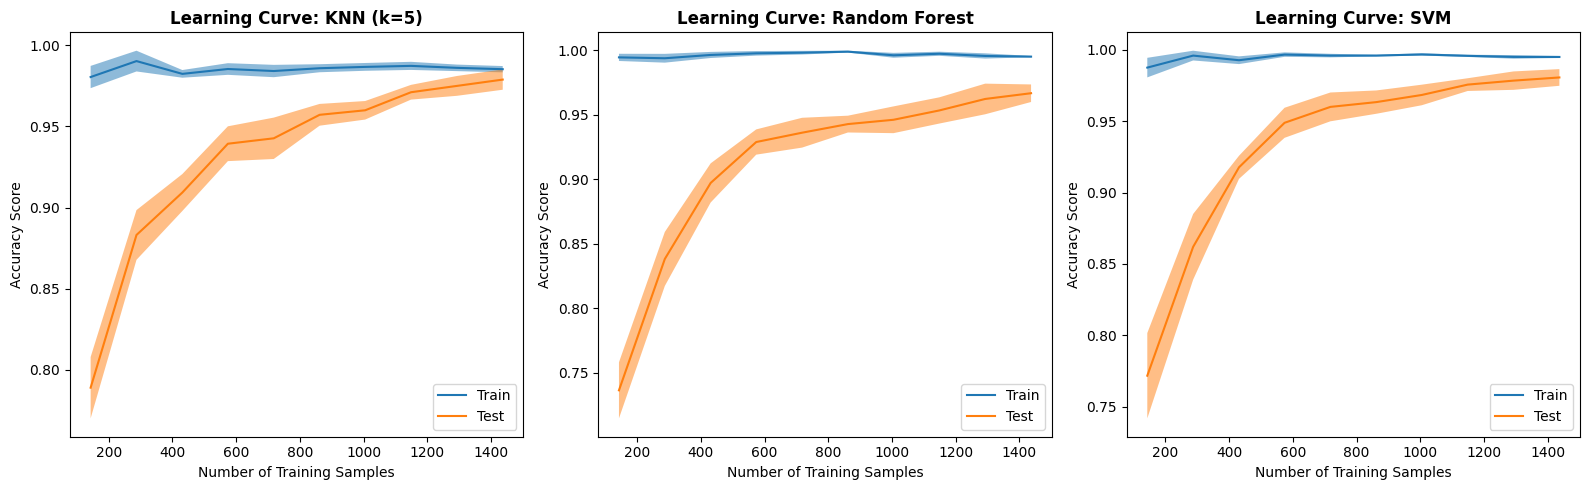


Comparison Summary:
- All models show different learning dynamics
- Compare the final validation scores to choose the best model
- Compare the gaps to understand which model has the best bias-variance tradeoff
- Regularization on Random Forest ensures more realistic training scores


In [12]:
# Create three models with different characteristics
models = {
    'KNN (k=5)': make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5)),
    'Random Forest': RandomForestClassifier(
        n_estimators=100, 
        max_depth=10, 
        min_samples_split=10,
        min_samples_leaf=4,
        random_state=42
    ),
    'SVM': make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=0.01, random_state=42))
}

# Create learning curves for all models
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, (name, model) in enumerate(models.items()):
    LearningCurveDisplay.from_estimator(
        model,
        X, y,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring="accuracy",
        ax=axes[idx],
        train_sizes=np.linspace(0.1, 1.0, 10),
        n_jobs=-1
    )
    axes[idx].set_title(f"Learning Curve: {name}", fontsize=12, fontweight='bold')
    axes[idx].set_xlabel("Number of Training Samples", fontsize=10)
    axes[idx].set_ylabel("Accuracy Score", fontsize=10)

plt.tight_layout()
plt.show()

print("\nComparison Summary:")
print("- All models show different learning dynamics")
print("- Compare the final validation scores to choose the best model")
print("- Compare the gaps to understand which model has the best bias-variance tradeoff")
print("- Regularization on Random Forest ensures more realistic training scores")

## 6. Summary

### Validation Curves:
- **Purpose**: Find optimal hyperparameter values
- **How to read**: Look for peak in validation score (orange line)
- **Patterns**:
  - Large gap → overfitting (high variance)
  - Low scores both → underfitting (high bias)
  - Tight curves at high score → well-tuned

### Learning Curves:
- **Purpose**: Determine if more data would help
- **How to read**: Check if validation score still climbing
- **Patterns**:
  - Both curves plateau → enough data, focus on model complexity
  - Validation still rising → more data would help
  - Large gap → model has high variance, more data helps